# Forecasting for Banking Using Time Series Methods, Homework 1
© Hugo Bourrousse  
September 2025

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Load dataframe
final_df = pd.read_pickle("final_df.pkl")
final_df.head(10)

,de_loan,de_dep,de_cap,de_gdp,de_ints,de_intl,de_ciss,de_hicp,de_gdp_sa,de_dep_sa,de_loan_sa,de_cap_sa,de_gdp_g,de_loan_g,de_dep_g,de_loan_d,de_dep_d
1997Q4,3415366.0,2987309.0,197963.0,506217.29,NaN,5.490000,NaN,0.516667,500342.745117,2.973880e+06,3.419621e+06,197611.568877,NaN,NaN,NaN,NaN,NaN
1998Q1,3435838.0,3005318.0,202938.0,481205.72,NaN,5.000000,NaN,0.206667,489744.562729,3.009455e+06,3.436576e+06,203130.855336,NaN,NaN,NaN,20472.0,18009.0
1998Q2,3517512.0,3064839.0,207787.0,492703.92,NaN,4.886667,NaN,0.296667,497434.159663,3.061233e+06,3.513953e+06,207260.974178,NaN,NaN,NaN,81674.0,59521.0
1998Q3,3566887.0,3088691.0,207969.0,509263.72,NaN,4.386667,NaN,0.213333,501637.063256,3.102089e+06,3.565296e+06,208671.590352,NaN,NaN,NaN,49375.0,23852.0
1998Q4,3698872.0,3237024.0,212630.0,521496.95,NaN,4.013333,NaN,0.116667,515445.087886,3.222472e+06,3.703481e+06,212252.531485,3.018399,8.300897,8.359196,131985.0,148333.0
1999Q1,3663429.0,3153883.0,218397.0,495250.00,NaN,3.863333,NaN,0.090000,504038.054019,3.158224e+06,3.664216e+06,218604.546279,2.918560,6.624032,4.943404,-35443.0,-83141.0
1999Q2,3728913.0,3200743.0,227867.0,507670.00,NaN,4.073333,NaN,0.183333,512543.922598,3.196977e+06,3.725140e+06,227290.140398,3.037540,6.009958,4.434295,65484.0,46860.0
1999Q3,3816760.0,3253088.0,232738.0,524670.00,NaN,4.866667,NaN,0.236667,516812.621128,3.267199e+06,3.815057e+06,233524.268499,3.025207,7.005352,5.322546,87847.0,52345.0
1999Q4,3878472.0,3302450.0,236956.0,537290.00,NaN,5.160000,NaN,0.370000,531054.862871,3.287604e+06,3.883304e+06,236535.347085,3.028407,4.855534,2.021177,61712.0,49362.0
2000Q1,3892954.0,3330627.0,241791.0,515500.00,2.73,5.460000,NaN,0.546667,524647.383840,3.335212e+06,3.893790e+06,242020.777984,4.088844,6.265305,5.604013,14482.0,28177.0


**Instructions**:
1. Fit an ARMA process on the growth rate of banks'capital on the sample 1997-2014
2. Forecast using the estimated model for the period 2015-2018

## 1. Graphical analysis

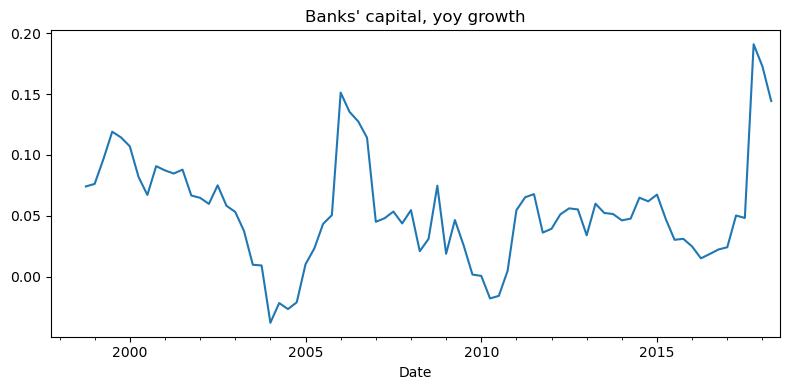

In [7]:
# Create the series
final_df['de_cap_g'] = final_df['de_cap'].pct_change(4,fill_method=None)

# plot the series
plt.figure(figsize=(8,4))
final_df['de_cap_g'].plot(title="Banks' capital, yoy growth")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

**Note:** inspecting the series, we can already expect that estimating up to 2014 and forecasting after, we're going to do a poor job as we will likely completely miss that sharp increase

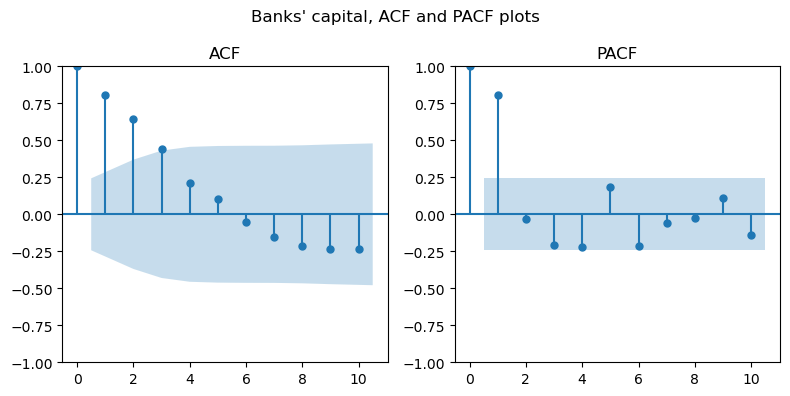

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# we select the relevant sample for estimation
series = final_df['de_cap_g'][final_df.index<"2015Q1"].dropna()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Banks' capital, ACF and PACF plots")
plot_acf(series, lags=10, ax=axes[0], title='ACF')
plot_pacf(series, lags=10, ax=axes[1], title='PACF')
plt.tight_layout()
plt.show()

**Observations**
- the ACF does decay gradually but turns negative after 5 lags $\Rightarrow$ not so conclusive, suggest AR but also perhaps MA terms
- the PACF cutoffs after one lag, which is indicative of an autoregressive process of order 1
- We can try: AR(1), ARMA(1,4) 

## 2. Estimation

In [15]:
from statsmodels.tsa.arima.model import ARIMA
# define and fit the models

# AR(1)
model = ARIMA(series, order=(1,0,0))
result_ar1 = model.fit()

# ARMA(1,4)
model = ARIMA(series, order=(1,0,4))
result_arma14 = model.fit()

# printing results
print(result_ar1.summary())
print('\n\n')
print(result_arma14.summary())

                               SARIMAX Results                                
Dep. Variable:               de_cap_g   No. Observations:                   65
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 151.923
Date:                Fri, 26 Sep 2025   AIC                           -297.847
Time:                        10:58:45   BIC                           -291.324
Sample:                    12-31-1998   HQIC                          -295.273
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0533      0.015      3.594      0.000       0.024       0.082
ar.L1          0.8019      0.087      9.257      0.000       0.632       0.972
sigma2         0.0005   5.45e-05      9.852      0.0

- the ARMA(1,4) is clearly to be discarded
- the AR(1) looks OK but we have to be careful with the residuals, we strongly reject the normality null in the JB test

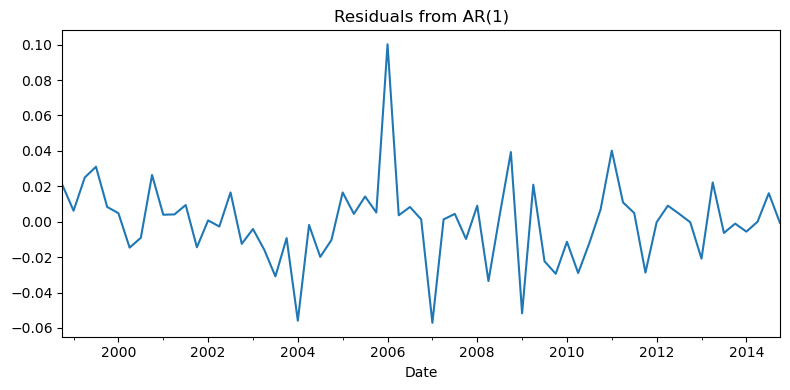

In [18]:
# Inspecting the residuals
resid_ar1 = result_ar1.resid

plt.figure(figsize=(8,4))
resid_ar1.plot(title="Residuals from AR(1)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

So the big culprit is what happens around 2006, which we could also see on the yoy growth series of banks' capital. So we can try to estimate the model with a dummy for that time period

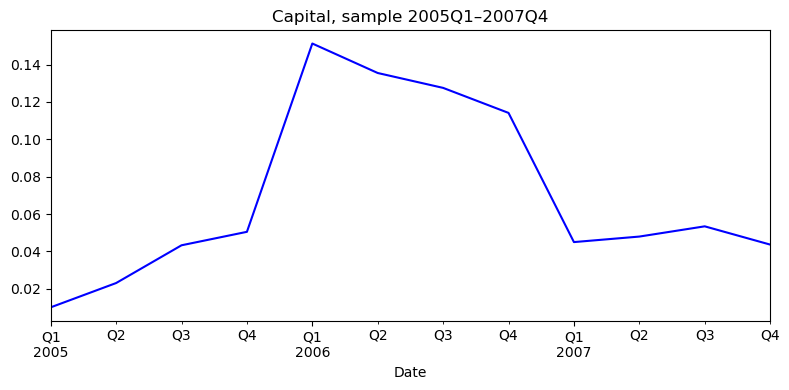

In [21]:
# Let's cleanly identify the "problematic" quarters
subsample = series.loc["2005Q1":"2007Q4"]
plt.figure(figsize=(8,4))
subsample.plot(title="Capital, sample 2005Q1–2007Q4", linewidth=1.5, color="blue")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

Ok, so the problem is the full year 2006, let's create a dummy for that year and see if this improves the fit

In [24]:
dummy = ((series.index >= "2006Q1")&(series.index <= "2006Q4")).astype(int)

# define AR(1) with dummy
model = ARIMA(series, order=(1,0,0),exog=dummy)
result_ar1_dum = model.fit()
print(result_ar1_dum.summary())

                               SARIMAX Results                                
Dep. Variable:               de_cap_g   No. Observations:                   65
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 166.567
Date:                Fri, 26 Sep 2025   AIC                           -325.134
Time:                        10:58:50   BIC                           -316.437
Sample:                    12-31-1998   HQIC                          -321.702
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.014      3.477      0.001       0.021       0.077
x1             0.0848      0.018      4.815      0.000       0.050       0.119
ar.L1          0.8311      0.073     11.318      0.0

$\Rightarrow$ clear improvement in fit when adding the constant

Let's check whether adding a second lag for the AR part improves the fit

In [27]:
# define AR(2) with dummy
model = ARIMA(series, order=(2,0,0),exog=dummy)
result_ar2_dum = model.fit()
print(result_ar2_dum.summary())

                               SARIMAX Results                                
Dep. Variable:               de_cap_g   No. Observations:                   65
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 166.614
Date:                Fri, 26 Sep 2025   AIC                           -323.228
Time:                        10:58:52   BIC                           -312.356
Sample:                    12-31-1998   HQIC                          -318.938
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0494      0.016      3.179      0.001       0.019       0.080
x1             0.0849      0.018      4.836      0.000       0.050       0.119
ar.L1          0.8007      0.121      6.630      0.0

In [29]:
# Let's summarise the info in a table
models = {
    'AR(1)': result_ar1,
    'AR(1) + dum': result_ar1_dum,
    'AR(2) + dum': result_ar2_dum
}

# Create a summary table
summary_fit = []
for name, res in models.items():
    summary_fit.append({
        'Model': name,
        'AIC': res.aic,
        'BIC': res.bic,
        'Log-Likelihood': res.llf
    })

fit_table = pd.DataFrame(summary_fit)
fit_table.set_index('Model', inplace=True)

print("\nFit measures of the three models estimated")
print("="*60)
print(fit_table.to_string())


Fit measures of the three models estimated
                    AIC         BIC  Log-Likelihood
Model                                              
AR(1)       -297.846976 -291.323814      151.923488
AR(1) + dum -325.134184 -316.436635      166.567092
AR(2) + dum -323.227564 -312.355628      166.613782


Improvement in fit is minimal. At this point, it's much better to be parsimonious and go for the AR(1) with dummy

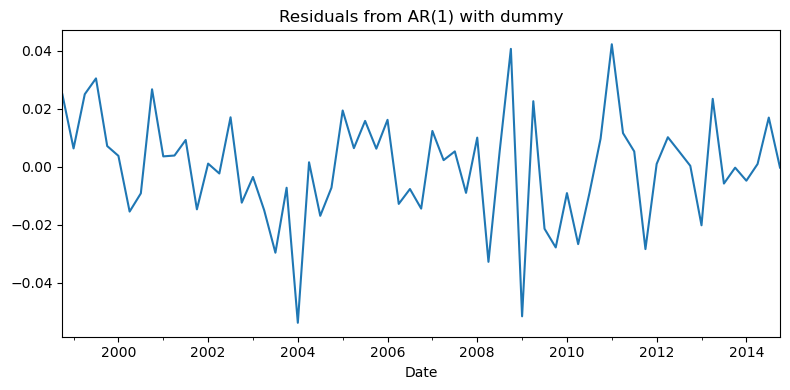

In [32]:
# Diagnosis check on the residuals for the selected model
resid_ar1_dum = result_ar1_dum.resid

plt.figure(figsize=(8,4))
resid_ar1_dum.plot(title="Residuals from AR(1) with dummy")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

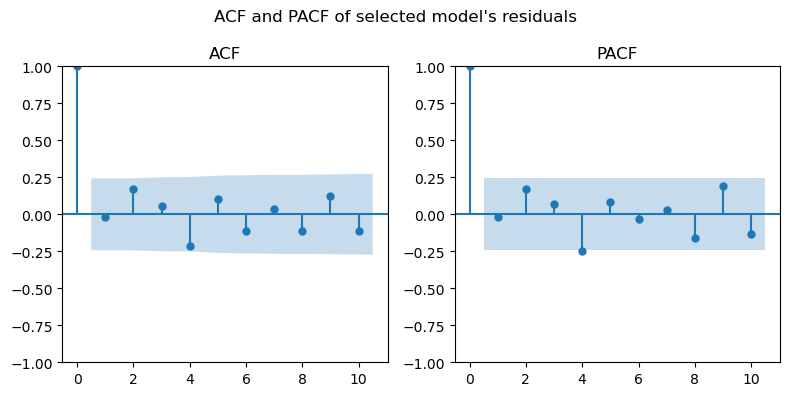

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("ACF and PACF of selected model's residuals")
plot_acf(resid_ar1_dum, lags=10, ax=axes[0], title='ACF')
plot_pacf(resid_ar1_dum, lags=10, ax=axes[1], title='PACF')
plt.tight_layout()
plt.show()

In [37]:
# Last, we check what the auto model selection based on information criterion would have suggested
import pmdarima as pm

# Automatic ARMA/ARIMA selection
model_sel = pm.auto_arima(
    series,
    start_p=0, max_p=5,        # AR order range
    start_q=0, max_q=5,        # MA order range
    d=0,                        # No differencing, we already work with the series in first differences
    seasonal=False,             # no seasonal adjustment needed
    stepwise=True,              # Faster search
    information_criterion='aic' # we could use something else
)
print("Selected ARMA order:", model_sel.order)

Selected ARMA order: (2, 0, 3)


$\Rightarrow$ the suggested model is an ARMA(2,3), quite more complex than the AR(1)

Can you investigate and try to explain why? Is it better really than our best model AR(1)+dum ?

## 3. Forecasting

### 3.1. Forecasting the whole forecast period

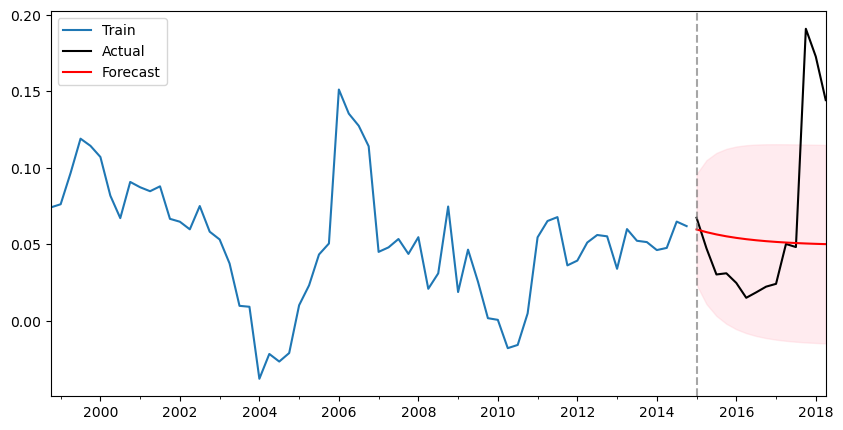

In [42]:
test_series = final_df['de_cap_g'].loc["2015Q1":"2018Q4"].dropna()

n_forecast = len(test_series) 
dummy_forecast = np.zeros(n_forecast)

forecast_result = result_ar1_dum.get_forecast(steps=n_forecast, exog=dummy_forecast)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int() 

# let's plot the forecast against the realised series
plt.figure(figsize=(10,5))
series.plot(label='Train')
test_series.plot(label='Actual', color='black')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.axvline("2015Q1", color="gray", linestyle="--", alpha=0.7, label="_nolegend_")
plt.legend()
plt.show()

In [44]:
# Obtaining forecasting metrics MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_nsteps = mean_squared_error(test_series, forecast_mean)
mae_nsteps = mean_absolute_error(test_series, forecast_mean)

print(f"MSE: {mse_nsteps:.4f}")
print(f"MAE: {mae_nsteps*100:.4f}%")

MSE: 0.0036
MAE: 4.2058%


### 3.2. 1-step ahead forecasts

Here, we still use the model estimated on the sample 1998Q1-2014Q4, but we compute 1-step ahead forecasts, meaning that we use the realised observation at each point in the forecasting period to produce next period's forecast

In [48]:
# Get model parameters (fixed from training sample)
params = result_ar1_dum.params
ar_coef = params.iloc[1]  # AR(1) coefficient 
constant = params.iloc[0]  # Constant term

# Get the last observation to build forecast on
last_obs = final_df['de_cap_g'].loc["2014Q4"]

# manual 1-step ahead forecasts, we're going to directly use the estimated process equation
forecast_1step = []
#previous_actual = last_train_value

for i, date in enumerate(test_series.index):
    # 1-step forecast: constant + ar_coef * previous_actual + dummy_effect
    forecast = constant + ar_coef*last_obs  # dummy=0
    forecast_1step.append(forecast)
    
    # Update last_obs with the true observed value for next forecast
    last_obs = final_df['de_cap_g'].loc[date]

# Convert to Series
forecast_1step = pd.Series(forecast_1step, index=test_series.index)

/var/folders/5g/45nql5kj3fsc42f1td53mt0w0000gn/T/ipykernel_23455/2382572918.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [full_series.loc[indices[i]], forecast_1step[i]]
/var/folders/5g/45nql5kj3fsc42f1td53mt0w0000gn/T/ipykernel_23455/2382572918.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [full_series.loc[indices[i]], forecast_1step[i]]
/var/folders/5g/45nql5kj3fsc42f1td53mt0w0000gn/T/ipykernel_23455/2382572918.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

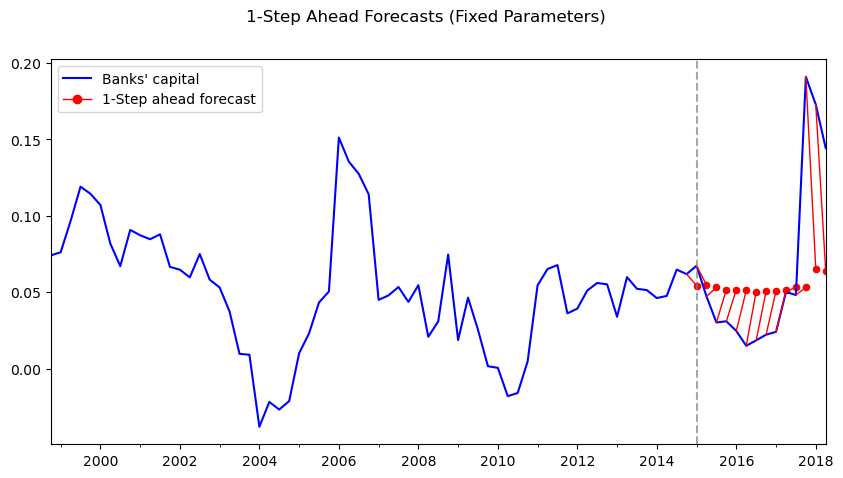

In [50]:
# Let's plot the forecast
# Full series
full_series = final_df['de_cap_g'].dropna()

# deal with the index so it works for the graph
indices = [series.index[-1]] + list(test_series.index)

plt.figure(figsize=(10,5))
full_series.plot(label="Banks' capital", color='blue')

# plot 1-step ahead forecasts
for i in range(len(test_series)):
    x = [indices[i], indices[i+1]]  
    y = [full_series.loc[indices[i]], forecast_1step[i]]  
    plt.plot(x, y, color='red', linewidth=1)     
    plt.scatter(x[1], y[1], color='red', s=20)  

# for legend only
plt.plot([], [], color='red', linewidth=1, marker='o', label='1-Step ahead forecast')

plt.axvline("2015Q1", color="gray", linestyle="--", alpha=0.7)  # forecast start
plt.legend()
plt.suptitle('1-Step Ahead Forecasts (Fixed Parameters)')
plt.show()

In [52]:
# Show results
print("1-Step Ahead Forecasts (Fixed Parameters):")
comparison = pd.DataFrame({'Actual': test_series, 'Forecast': forecast_1step, 
                          'Error': test_series - forecast_1step})
print(comparison.round(4))

mse_1step = ((test_series - forecast_1step)**2).mean()
mae_1step = np.abs(test_series - forecast_1step).mean()
print(f"\nMSE: {mse_1step:.6f}")
print(f"MAE: {mae_1step:.6f}")


1-Step Ahead Forecasts (Fixed Parameters):
        Actual  Forecast   Error
2015Q1  0.0674    0.0544  0.0130
2015Q2  0.0473    0.0548 -0.0075
2015Q3  0.0302    0.0531 -0.0229
2015Q4  0.0310    0.0517 -0.0207
2016Q1  0.0247    0.0517 -0.0271
2016Q2  0.0149    0.0512 -0.0363
2016Q3  0.0185    0.0504 -0.0319
2016Q4  0.0222    0.0507 -0.0284
2017Q1  0.0241    0.0510 -0.0269
2017Q2  0.0502    0.0511 -0.0010
2017Q3  0.0482    0.0534 -0.0052
2017Q4  0.1910    0.0532  0.1378
2018Q1  0.1728    0.0653  0.1075
2018Q2  0.1443    0.0638  0.0806

MSE: 0.003061
MAE: 0.039058


In [54]:
# Create comparison table between N-steps ahead and !-step ahead forecast
results_table = pd.DataFrame({
    'Method': ['N-Step Ahead', '1-Step Ahead'],
    'MSE': [mse_nsteps, mse_1step],
    'MAE': [mae_nsteps, mae_1step],
    'RMSE': [np.sqrt(mse_nsteps), np.sqrt(mse_1step)],
    'MAPE (%)': [np.mean(np.abs((test_series - forecast_mean) / test_series)) * 100,
                 np.mean(np.abs((test_series - forecast_1step) / test_series)) * 100]
})

print("Forecast Performance Comparison (2015Q1 - 2018Q2)")
print("=" * 55)
print(results_table.round(6).to_string(index=False))

# Show improvement
print(f"\nImprovement of 1-Step vs N-Step:")
print(f"MSE reduction:  {((mse_nsteps - mse_1step)/mse_nsteps)*100:.3f}%")
print(f"MAE reduction:  {((mae_nsteps - mae_1step)/mae_nsteps)*100:.3f}%")

Forecast Performance Comparison (2015Q1 - 2018Q2)
      Method      MSE      MAE     RMSE  MAPE (%)
N-Step Ahead 0.003590 0.042058 0.059919 87.442222
1-Step Ahead 0.003061 0.039058 0.055329 81.788333

Improvement of 1-Step vs N-Step:
MSE reduction:  14.734%
MAE reduction:  7.135%
